# Automatic Differentiation

Author: Pierre Nugues

In [1]:
import torch

A 3D curve:
$$
z = x^2 + xy + y^2
$$
Its gradient:
$$
\begin{array}{lcl}
\frac{\partial z}{\partial x} &=& 2x + y\\
\frac{\partial z}{\partial y} &=& x + 2y\\
\end{array}
$$

In [2]:
def f(x, y):
    return x**2 + x * y + y**2

## Data

In [3]:
x = torch.tensor(3.0, requires_grad=True)
y = torch.tensor(4.0, requires_grad=True)

In [4]:
z = f(x, y)
z

tensor(37., grad_fn=<AddBackward0>)

In [5]:
(2 * x + y).item(), (x + 2 * y).item()

(10.0, 11.0)

In [6]:
z.grad_fn

## Graph

In [7]:
from torchviz import make_dot

In [8]:
make_dot(z, params={'x': x, 'y': y, 'z': z}, show_attrs=True).render(
    "autograd_torchviz", format="png")

'autograd_torchviz.png'

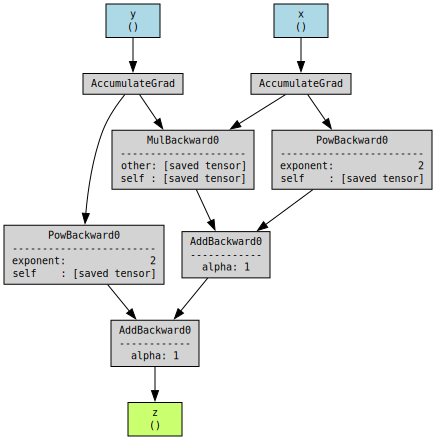

In [9]:
make_dot(z, params={'x': x, 'y': y, 'z': z}, show_attrs=True)

# Manual Computations

The `retain_graph` is necessary to visualize the graph below

In [10]:
z.backward(retain_graph=True)

In [11]:
z

tensor(37., grad_fn=<AddBackward0>)

In [12]:
z.grad_fn

In [13]:
z.grad_fn.next_functions

((<AddBackward0 at 0x1203d7e20>, 0), (<PowBackward0 at 0x1203eba00>, 0))

In [14]:
z.grad_fn.next_functions[0][0].next_functions

((<PowBackward0 at 0x1203eb9a0>, 0), (<MulBackward0 at 0x1203eb880>, 0))

In [15]:
z.grad_fn.next_functions[0][0].next_functions[0][0].next_functions

((<AccumulateGrad at 0x1203eba60>, 0),)

In [16]:
z.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions

()

In [17]:
x.grad, y.grad

(tensor(10.), tensor(11.))